In [ ]:
pip install transformers -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("Combined Data.csv")
data.head()

,IsoNumber,Spoligotype Octal,Spoligotype Binary,Drug Resistance
0,IND0820040492,7.037780e+14,nnnoooonnnnnnnnnnnnnnnoooooooooooooonnnnnnn,2
1,IND0820040494,7.777780e+14,nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnonoooonnnnnnn,2
2,IND0820040496,3.771000e+03,oooooooooooooooooooooooooooooooooonnnnnnnnn,2
3,IND0820040498,7.037780e+14,nnnoooonnnnnnnnnnnnnnnoooooooooooonnnnnnnnn,2
4,IND0820040500,3.771000e+03,oooooooooooooooooooooooooooooooooonnnnnnnnn,2


In [ ]:
data['Drug Resistance'].value_counts()

1    12228
2     3791
3     2332
4      316
Name: Drug Resistance, dtype: int64

In [ ]:
data.shape

(18667, 4)

In [ ]:
data.isna().sum()

IsoNumber              0
Spoligotype Octal     22
Spoligotype Binary     0
Drug Resistance        0
dtype: int64

In [ ]:
data = data.sample(18667).reset_index(drop=True)
data.head(10)

,IsoNumber,Spoligotype Octal,Spoligotype Binary,Drug Resistance
0,OMN012007173651,1.777780e+14,oonnnnnnnnnnnnnnnnnnoooonnnnnnnnoooonnnnnnn,1
1,ESP021999255851,7.561780e+14,nnnnonnnooonnnnnnnnnoooonnnnnnnnoooonnnnnnn,2
2,OMN012008173821,4.000380e+14,noooooooooooonnnnnnnnnnnnnnnoooononnnnnnnnn,1
3,GUF032005127314,7.763380e+14,nnnnnnnnoonnonnnnnnnnnnnnnnnnnnnoooonnnonnn,1
4,IND0820060586,3.700000e+03,oooooooooooooooooooooooooooooooooonnnnnoooo,3
5,JPN042005147806,3.771000e+03,oooooooooooooooooooooooooooooooooonnnnnnnnn,1
6,BEL062006142193,3.777780e+14,onnnnnnnnnnnnnnnnnnnoooonnoooonnoooonnnnnnn,1
7,CHN062008220603,7.717780e+14,nnnnnnoonnnnnnnnnnnnnnnnnnnnnnnnoooonnnonnn,2
8,LVA012005471295,7.777780e+14,nnnnnnnnnnnnnnnnnnnnoooonnnnnnnnoooonnnnnnn,4
9,COL012006131442,7.763780e+14,nnnnnnnnoonnnnnnnnnnnnnnoooooooooooonnnonnn,1


In [ ]:
data.shape

(18667, 4)

<Axes: xlabel='Drug Resistance'>

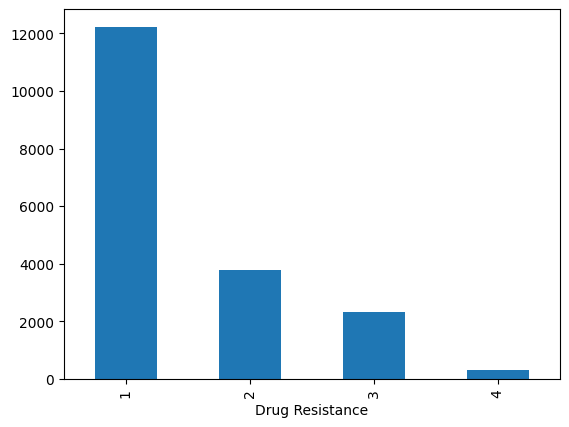

In [ ]:
data.groupby(['Drug Resistance']).size().plot.bar()

In [ ]:
print(data.head(5))

         IsoNumber  Spoligotype Octal  \
0  OMN012007173651       1.777780e+14   
1  ESP021999255851       7.561780e+14   
2  OMN012008173821       4.000380e+14   
3  GUF032005127314       7.763380e+14   
4    IND0820060586       3.700000e+03   

                            Spoligotype Binary  Drug Resistance  
0  oonnnnnnnnnnnnnnnnnnoooonnnnnnnnoooonnnnnnn                1  
1  nnnnonnnooonnnnnnnnnoooonnnnnnnnoooonnnnnnn                2  
2  noooooooooooonnnnnnnnnnnnnnnoooononnnnnnnnn                1  
3  nnnnnnnnoonnonnnnnnnnnnnnnnnnnnnoooonnnonnn                1  
4  oooooooooooooooooooooooooooooooooonnnnnoooo                3  


In [ ]:
data = data.dropna()

In [ ]:
data.head(5)

,IsoNumber,Spoligotype Octal,Spoligotype Binary,Drug Resistance
0,OMN012007173651,1.777780e+14,oonnnnnnnnnnnnnnnnnnoooonnnnnnnnoooonnnnnnn,1
1,ESP021999255851,7.561780e+14,nnnnonnnooonnnnnnnnnoooonnnnnnnnoooonnnnnnn,2
2,OMN012008173821,4.000380e+14,noooooooooooonnnnnnnnnnnnnnnoooononnnnnnnnn,1
3,GUF032005127314,7.763380e+14,nnnnnnnnoonnonnnnnnnnnnnnnnnnnnnoooonnnonnn,1
4,IND0820060586,3.700000e+03,oooooooooooooooooooooooooooooooooonnnnnoooo,3


In [ ]:
data.shape

(18645, 4)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

#labels = {'1':0,
 #         '2':1,
  #        '3':2,
   #       '4':3,
    #      }


In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
sample_data = ["nnnoooonnnnnnnnnnnnnnnoooooooooooooonnnnnnn"]
tokenizer(sample_data, padding=True, truncation=True, max_length=512)

{'input_ids': [[101, 1050, 10695, 9541, 7828, 10695, 10695, 10695, 10695, 10695, 10695, 10695, 9541, 9541, 9541, 9541, 9541, 9541, 7828, 10695, 10695, 10695, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
X = list(data["Spoligotype Binary"])
y = list(data["Drug Resistance"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

In [ ]:
X_train_tokenized.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print(X_train_tokenized['input_ids'][0])
print(X_train_tokenized['token_type_ids'][0])
print(X_train_tokenized['attention_mask'][0])


[101, 1050, 10695, 10695, 10695, 10695, 10695, 10695, 10695, 10695, 2239, 10695, 10695, 10695, 10695, 10695, 10695, 3630, 9541, 2239, 10695, 2239, 10695, 102]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
len(X_train),len(X_val)

(14916, 3729)

In [ ]:
x_train

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])





In [ ]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [ ]:
train_dataset[5]

{'input_ids': tensor([  101,  1050, 10695, 10695, 10695, 10695, 10695, 10695, 10695, 10695,
         10695, 10695,  8540, 10695, 10695,  9541,  7828,  2239,  8540, 10695,
         10695,  2078,   102,     0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]),
 'labels': tensor(1)}

In [ ]:


def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred, average='weighted')  # Update average='weighted'
    precision = precision_score(y_true=labels, y_pred=pred, average='weighted')  # Update average='weighted'
    f1 = f1_score(y_true=labels, y_pred=pred, average='weighted')  # Update average='weighted'

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}


In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 1.9 MB/s eta 0:00:00


In [ ]:

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 3 labels with different weights)
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor([0.25, 0.5, 0.75, 1.0], device=model.device))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [ ]:
args = TrainingArguments(
    output_dir="output",
    num_train_epochs=5,
    per_device_train_batch_size=16

)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)


In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.957500


In [ ]:
trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.9304071664810181,
 'eval_accuracy': 0.6551354250469295,
 'eval_precision': 0.42920242515142093,
 'eval_recall': 0.6551354250469295,
 'eval_f1': 0.5186311870996917,
 'eval_runtime': 8.3215,
 'eval_samples_per_second': 448.116,
 'eval_steps_per_second': 56.12,
 'epoch': 5.0}

In [ ]:
trainer.save_model('CustomModel')